**Data Loading**

In [92]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [93]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [94]:
# Load the dataset
print("📥 LOADING IRIS DATASET...")
print("="*50)
df=pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head(5)

📥 LOADING IRIS DATASET...


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
# Display basic info
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())
print("\n" + "="*50)


📊 Dataset Shape: (150, 6)
📋 Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa



**Complete Exploratory Data Analysis (EDA)**

In [102]:
# Display complete dataset info
print("📋 DATASET INFORMATION:")
df.info()

📋 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [100]:

print("\n📊 DESCRIPTIVE STATISTICS:")
df.describe()


📊 DESCRIPTIVE STATISTICS:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [103]:
print("\n🌼 SPECIES DISTRIBUTION:")
species_counts = df['Species'].value_counts()
print(species_counts)
print(f"\n• Total Samples: {len(df)}")
print(f"• Number of Species: {len(species_counts)}")
print(f"• Species: {', '.join(species_counts.index.tolist())}")


🌼 SPECIES DISTRIBUTION:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

• Total Samples: 150
• Number of Species: 3
• Species: Iris-setosa, Iris-versicolor, Iris-virginica


In [104]:

print("\n🧮 DATA TYPES:")
df.dtypes


🧮 DATA TYPES:


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [105]:
print("\n🔍 CHECKING FOR MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ No missing values found!")


🔍 CHECKING FOR MISSING VALUES:
✅ No missing values found!


In [106]:
print("\n🔍 CHECKING FOR DUPLICATES:")
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New shape: {df.shape}")


🔍 CHECKING FOR DUPLICATES:
Duplicates found: 0


**Statistical Analysis by Species**

In [108]:
# Group by species for statistical analysis
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

print("📊 MEASUREMENTS BY SPECIES:")
for col in numeric_cols:
    print(f"\n{col}:")
    stats_by_species = df.groupby('Species')[col].agg(['mean', 'median', 'std', 'min', 'max'])
    print(stats_by_species.round(2))

📊 MEASUREMENTS BY SPECIES:

SepalLengthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      5.01     5.0  0.35  4.3  5.8
Iris-versicolor  5.94     5.9  0.52  4.9  7.0
Iris-virginica   6.59     6.5  0.64  4.9  7.9

SepalWidthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      3.42     3.4  0.38  2.3  4.4
Iris-versicolor  2.77     2.8  0.31  2.0  3.4
Iris-virginica   2.97     3.0  0.32  2.2  3.8

PetalLengthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      1.46    1.50  0.17  1.0  1.9
Iris-versicolor  4.26    4.35  0.47  3.0  5.1
Iris-virginica   5.55    5.55  0.55  4.5  6.9

PetalWidthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      0.24     0.2  0.11  0.1  0.6
Iris-versicolor  1.33     1.3  0.20  1.0  1.8
Iris-virginica   2.03     2.0  0.27  

In [109]:
print("\n📏 RANGE ANALYSIS:")
for col in numeric_cols:
    print(f"\n{col}:")
    range_by_species = df.groupby('Species')[col].agg(lambda x: f"{x.min():.1f} - {x.max():.1f}")
    print(range_by_species)


📏 RANGE ANALYSIS:

SepalLengthCm:
Species
Iris-setosa        4.3 - 5.8
Iris-versicolor    4.9 - 7.0
Iris-virginica     4.9 - 7.9
Name: SepalLengthCm, dtype: object

SepalWidthCm:
Species
Iris-setosa        2.3 - 4.4
Iris-versicolor    2.0 - 3.4
Iris-virginica     2.2 - 3.8
Name: SepalWidthCm, dtype: object

PetalLengthCm:
Species
Iris-setosa        1.0 - 1.9
Iris-versicolor    3.0 - 5.1
Iris-virginica     4.5 - 6.9
Name: PetalLengthCm, dtype: object

PetalWidthCm:
Species
Iris-setosa        0.1 - 0.6
Iris-versicolor    1.0 - 1.8
Iris-virginica     1.4 - 2.5
Name: PetalWidthCm, dtype: object


**Advanced Data Visualization**


📊 VISUALIZING DATA DISTRIBUTIONS


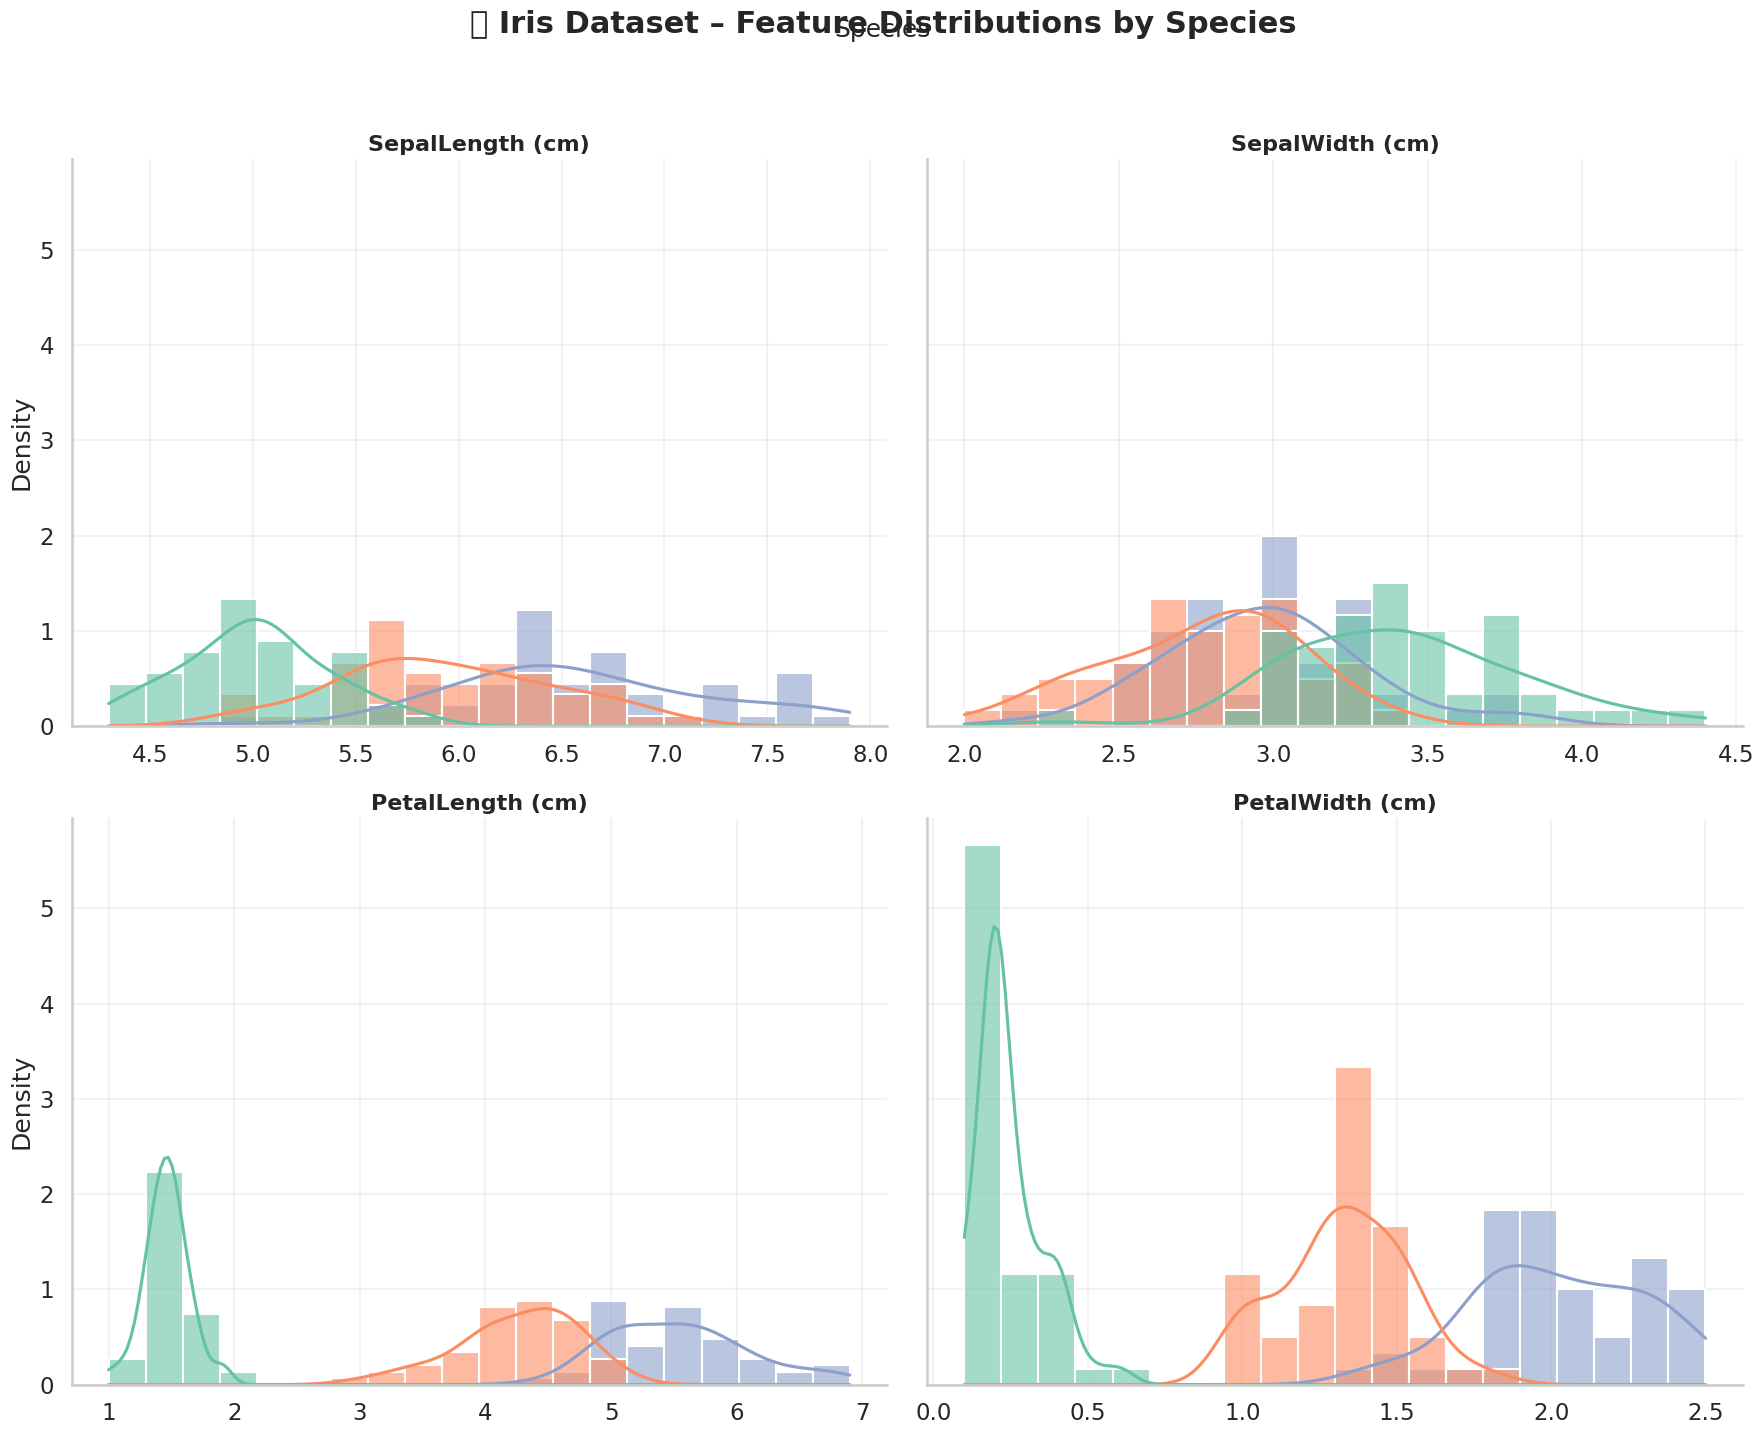

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 VISUALIZING DATA DISTRIBUTIONS")
print("=" * 50)

# Style configuration
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="Set2"
)

# Create figure
fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(18, 14),
    sharey=True
)

fig.suptitle(
    "🌸 Iris Dataset – Feature Distributions by Species",
    fontsize=22,
    fontweight="bold",
    y=1.03
)

axes = axes.flatten()

# Plot each numeric feature
for ax, feature in zip(axes, numeric_cols):
    sns.histplot(
        data=df,
        x=feature,
        hue="Species",
        kde=True,
        bins=20,
        alpha=0.6,
        ax=ax,
        stat="density",
        common_norm=False
    )
    
    ax.set_title(
        feature.replace("Cm", " (cm)"),
        fontsize=16,
        fontweight="bold"
    )
    
    ax.set_xlabel("")
    ax.set_ylabel("Density")
    ax.grid(True, alpha=0.25)
    sns.despine(ax=ax)

# Adjust legend (single legend for the whole figure)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="Species",
    loc="upper center",
    ncol=3,
    frameon=False,
    fontsize=14
)

# Remove duplicate legends
for ax in axes:
    ax.get_legend().remove()

plt.tight_layout()
plt.show()
